<a href="https://colab.research.google.com/github/Samrat-Doi/Samrat-Doi/blob/main/Income_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/income_evaluation.csv')

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.rename( columns = {' workclass': 'workclass', ' fnlwgt': 'fnlwgt', ' education': 'education', ' education-num': 'education_num',
                ' marital-status':'marital_status', ' occupation': 'occupation', ' relationship': 'relationship', ' race': 'race',
                ' sex': 'sex', ' capital-gain': 'capital_gain', ' capital-loss': 'capital_loss', ' hours-per-week': 'hour_per_week',
                ' native-country':'native_country', ' income':'income'}, inplace = True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hour_per_week     0
native_country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hour_per_week   32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hour_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]
df['native_country'] = np.where(df.native_country == '?', np.nan, df['native_country'])
df['workclass'] = np.where(df.workclass == ' ?', np.nan, df['workclass'])
df['occupation'] = np.where(df.occupation == ' ?', np.nan, df['occupation'])

In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [ ]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

# Data Visualization

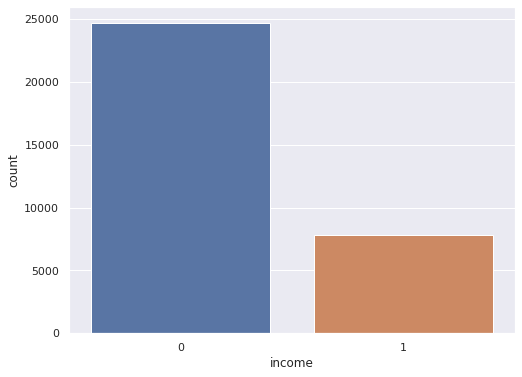

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(df['income'])
plt.show()

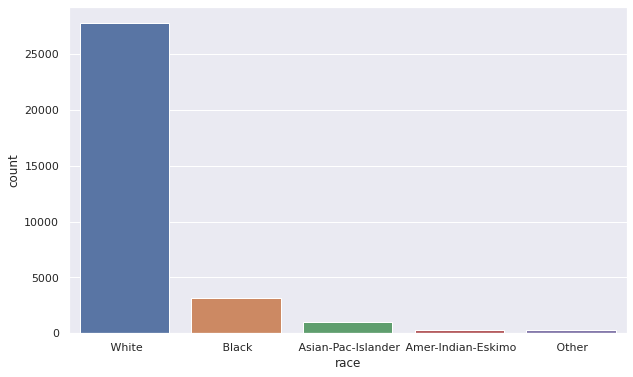

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['race'])
plt.show()

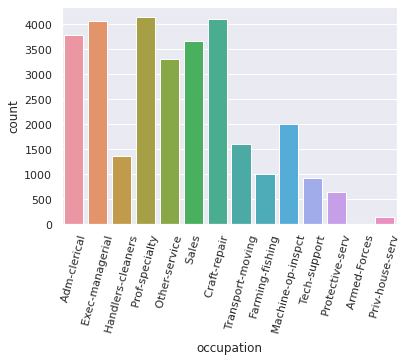

In [ ]:
sns.set_style(rc ={'figure.figsize':(12,6)})
plt.xticks(rotation =75)
sns.countplot(df['occupation'])
plt.show()

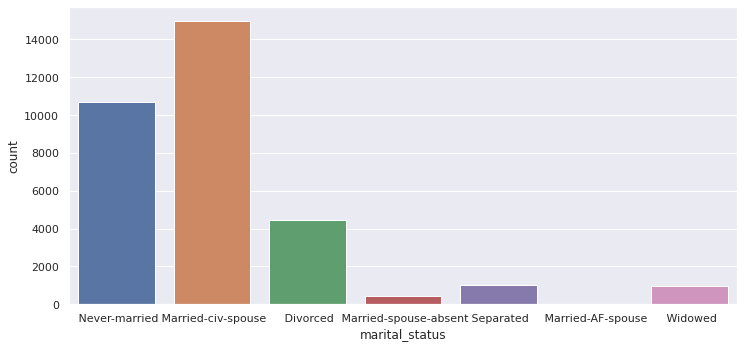

In [ ]:
sns.set(rc={'figure.figsize':(10.5,5)})
sns.countplot(df['marital_status'])
plt.tight_layout()
plt.show()

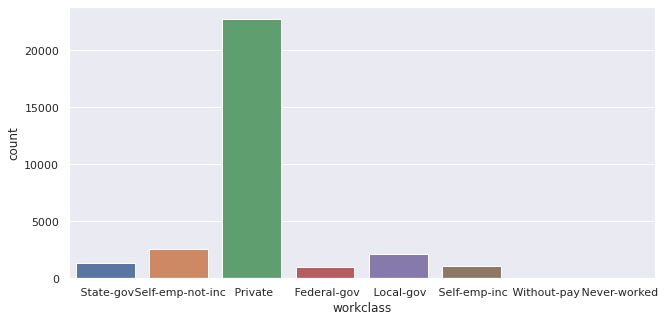

In [ ]:
sns.countplot(df['workclass'])
plt.show()

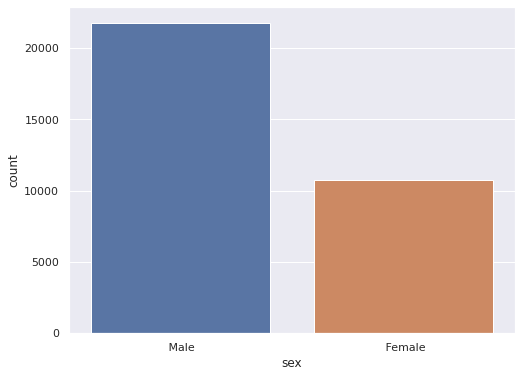

In [ ]:
sns.set(rc= {'figure.figsize': (8,6)})
sns.countplot(df['sex'])
plt.show()

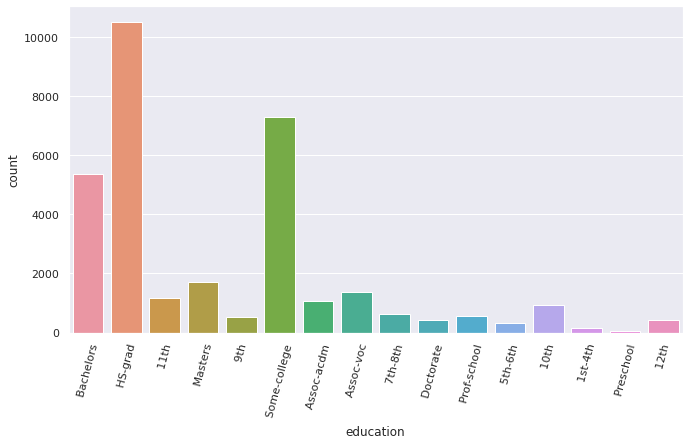

In [ ]:
plt.figure(figsize=(11,6))
plt.xticks(rotation = 75)
sns.countplot(df['education'])
plt.show()

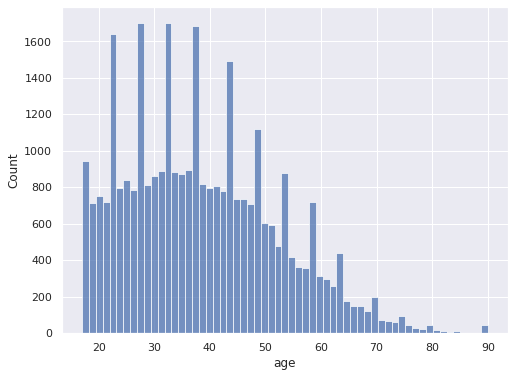

In [ ]:
sns.histplot(x = 'age', data =df)

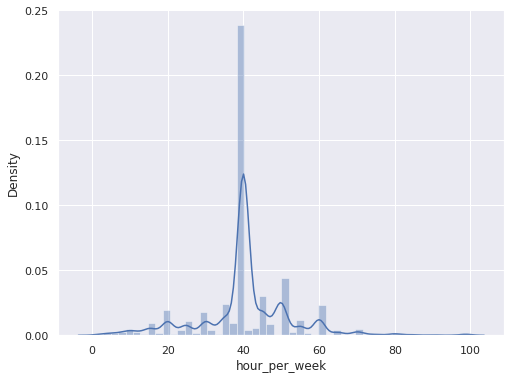

In [ ]:
sns.distplot(df['hour_per_week'])
plt.show()

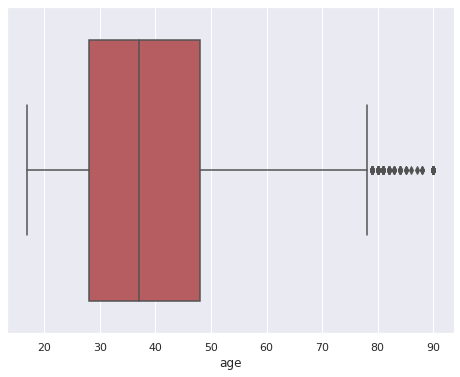

In [ ]:
sns.boxplot(df['age'], color = 'r')

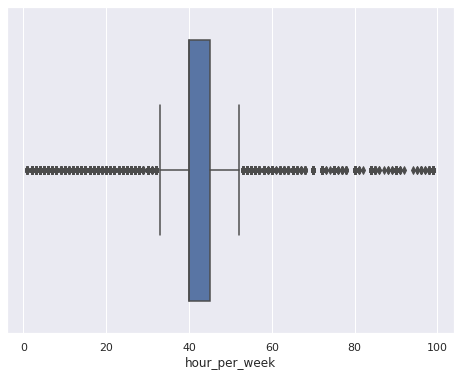

In [ ]:
sns.boxplot(df['hour_per_week'])

<Figure size 864x864 with 0 Axes>

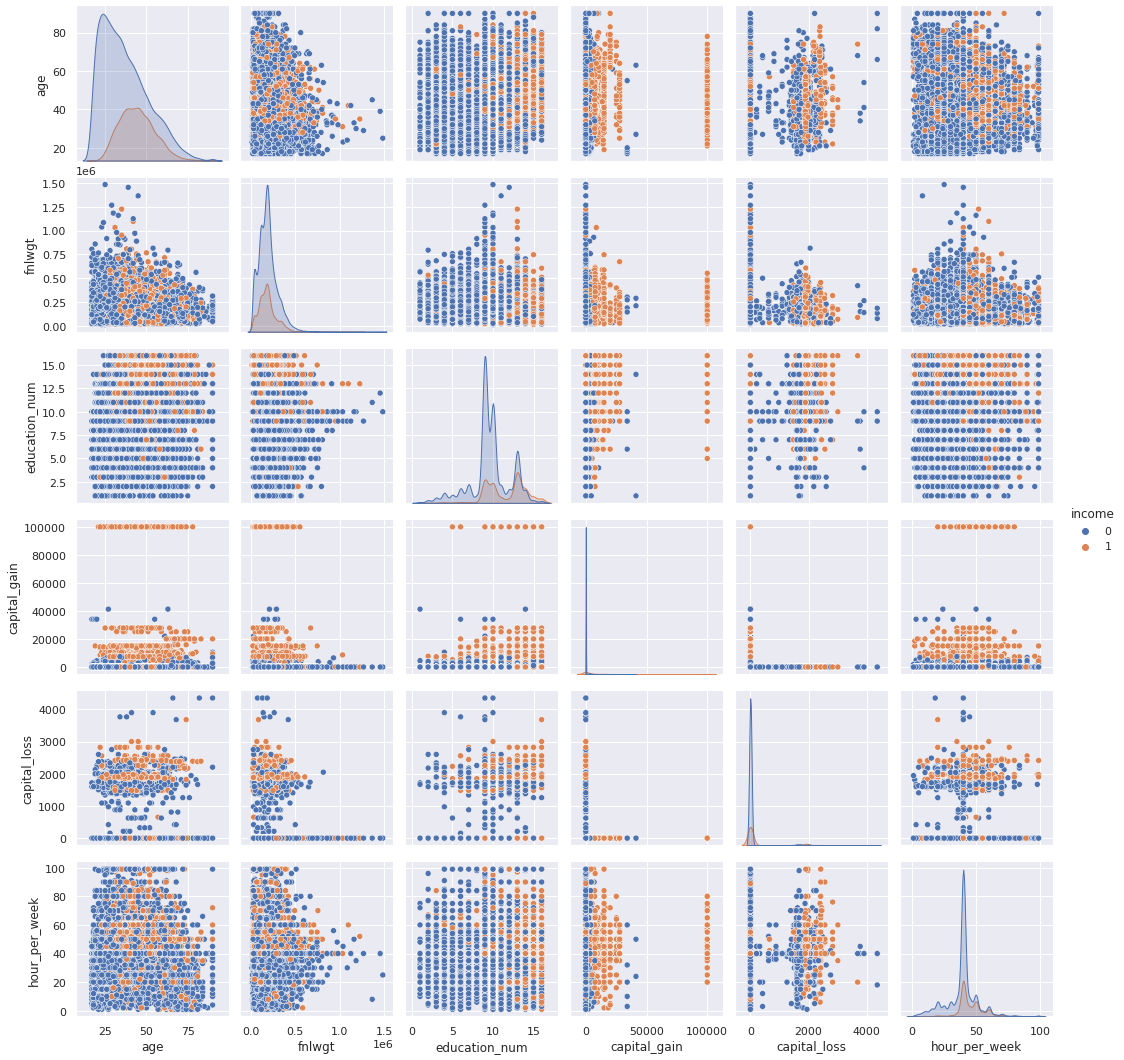

In [ ]:
plt.figure(figsize = (12,12))
sns.pairplot(df, hue = 'income')
plt.show()

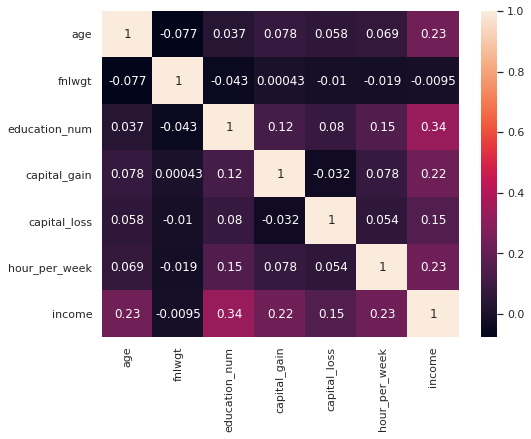

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# dropping education because there's already a column of education number in dataset
del df['education']

In [ ]:
df_cat = df.select_dtypes(include = 'object')
print(df_cat.columns)
df_cat = pd.get_dummies(df_cat)
print(df_cat.shape)

Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country'],
      dtype='object')
(32561, 84)


In [ ]:
df_cat.tail()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
32556,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32560,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_num = df.select_dtypes( exclude= 'object')
print(df_num.shape)
print('****************************************')
data = df_cat.join(df_num)
print(data.shape)

(32561, 7)
****************************************
(32561, 91)


In [ ]:
z = np.abs(stats.zscore(data))
print(z)

[[0.174 0.262 0.015 ... 0.217 0.035 0.563]
 [0.174 0.262 0.015 ... 0.217 2.222 0.563]
 [0.174 0.262 0.015 ... 0.217 0.035 0.563]
 ...
 [0.174 0.262 0.015 ... 0.217 0.035 0.563]
 [0.174 0.262 0.015 ... 0.217 1.655 0.563]
 [0.174 0.262 0.015 ... 0.217 0.035 1.776]]


In [ ]:
threshold = 3
print(np.where(z >3))

(array([    0,     1,     2, ..., 32558, 32560, 32560]), array([ 6,  5, 20, ..., 14,  4, 34]))


In [ ]:
data = data[(z <= 3).all(axis=1)]

In [ ]:
array = data.values
X = array[:,:-1]
y = array[:,-1]
normalizer = MinMaxScaler().fit(X)
x = normalizer.transform(X)
np.set_printoptions(precision=3)
print(x[:-5,:-5])

[[0.    0.    0.    ... 0.    0.    0.226]
 [0.    0.    0.    ... 0.    0.    0.403]
 [0.    0.    0.    ... 0.    0.    0.097]
 ...
 [0.    0.    0.    ... 0.    0.    0.274]
 [0.    0.    0.    ... 0.    0.    0.323]
 [0.    0.    0.    ... 0.    0.    0.274]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state =1)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test )


______________ Classification Report_________________
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3564
           1       0.72      0.60      0.66      1140

    accuracy                           0.85      4704
   macro avg       0.80      0.77      0.78      4704
weighted avg       0.84      0.85      0.84      4704

         
______________ Accuracy score______________
0.8482142857142857
                         
_____________ Confusion Metrix_____________


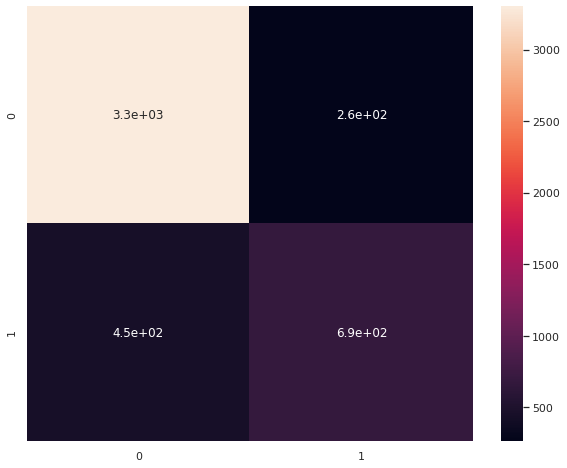

In [ ]:
print('______________ Classification Report_________________')
print(classification_report(y_test, predict))

print('         ')

print('______________ Accuracy score______________')
print(accuracy_score(y_test, predict))

print('                         ')
print('_____________ Confusion Metrix_____________')
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predict), annot = True)